In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Set Seaborn theme
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

In [76]:
# Load data
path = "/Users/tomi/Desktop/Thesis/result/"
df_eval = pd.read_csv(path + "Evaluation_Metrics_Table.csv", sep=";")
df_recall_ndcg = pd.read_csv(path + "Recall_and_NDCG_Results.csv", sep=";")
df_entropy = pd.read_csv(path + "System-Level_Entropy.csv", sep=";")

In [77]:
# Merge by 'Model'
df_combined = df_eval.merge(df_recall_ndcg, on="Model", how="left")
df_combined = df_combined.merge(df_entropy, on="Model", how="left")
df_combined.set_index("Model", inplace=True)
df_combined


,Hit Rate,Avg. Rank,HHI,Entropy,Gini,Recall@5,NDCG@5,System-Level Entropy
Model,,,,,,,,
S1 (Simple),1.0000,3.00,0.0104,6.6136,0.0285,0.0208,0.2346,NaN
S2 (Genre-Focused),0.8333,4.67,0.1000,3.3219,0.2557,0.0208,0.1461,NaN
S3 (Diversify + xLSTM),0.7667,4.00,0.1000,3.3219,0.4427,0.0015,0.0301,NaN
S4 (Diversify + Noise),0.1000,10.20,0.1000,3.3219,0.0483,0.0008,0.0110,NaN
S5 (Surprise),0.3000,9.40,0.1000,3.3219,0.0817,0.0079,0.0362,5.2398
S6 (Motivate Reasoning),0.1000,10.60,0.1000,3.3219,0.1924,0.0032,0.0073,6.0461
S7 (Chain-of-Thought),0.1000,2.10,0.1533,0.5907,0.0104,0.0125,0.0098,3.5850


In [78]:
# Merge all data
df = df_eval.merge(df_recall_ndcg, on="Model", how="left").merge(df_entropy, on="Model", how="left")
df.set_index("Model", inplace=True)

# Normalize all numeric columns
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

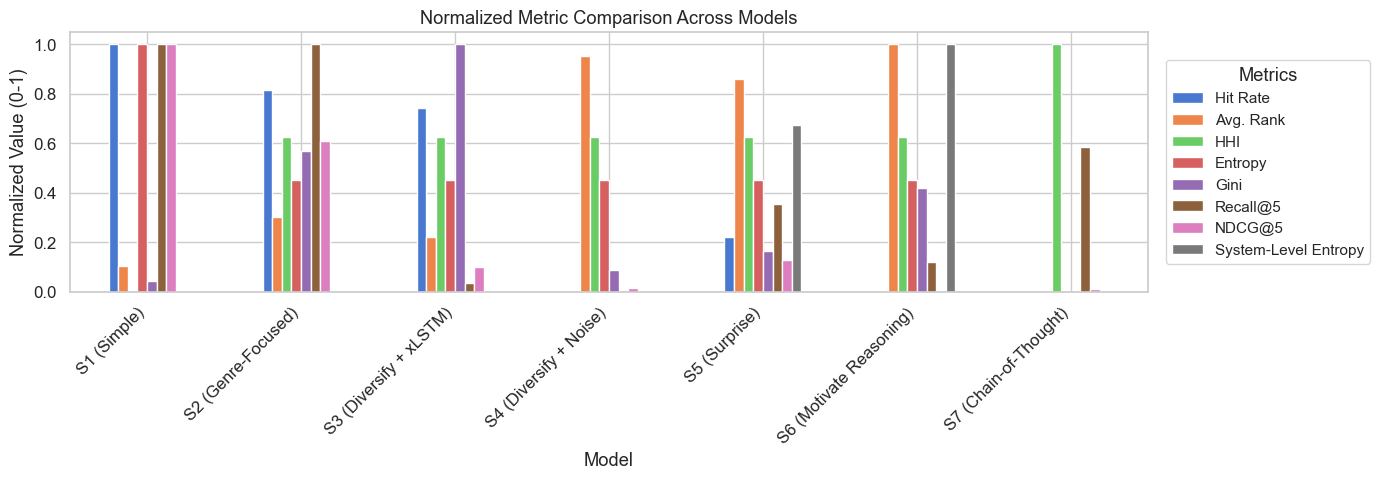

In [79]:
# --- Plot 1: Normalized Metric Comparison ---
fig, ax = plt.subplots(figsize=(14, 5))
df_normalized.plot(kind="bar", ax=ax)
ax.set_title("Normalized Metric Comparison Across Models")
ax.set_ylabel("Normalized Value (0-1)")
ax.set_xticklabels(df_normalized.index, rotation=45, ha='right')
ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title="Metrics", fontsize='small')
plt.tight_layout()
plt.show()

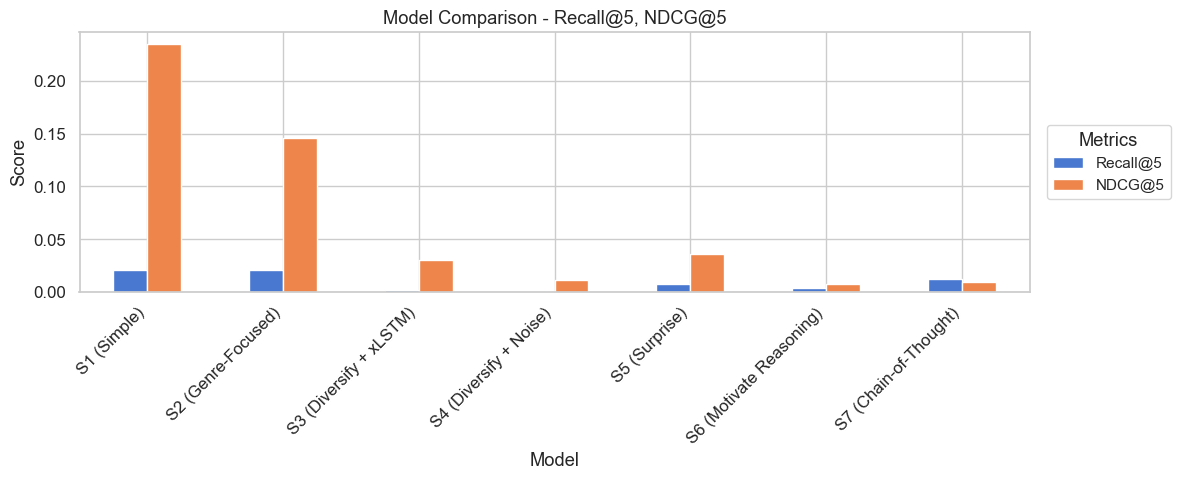

In [80]:
# --- Plot 2: Recall@5 and NDCG@5 ---
fig, ax = plt.subplots(figsize=(12, 5))
df[["Recall@5", "NDCG@5"]].plot(kind="bar", ax=ax)
ax.set_title("Model Comparison - Recall@5, NDCG@5")
ax.set_ylabel("Score")
ax.set_xticklabels(df.index, rotation=45, ha='right')
ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title="Metrics", fontsize='small')
plt.tight_layout()
plt.show()

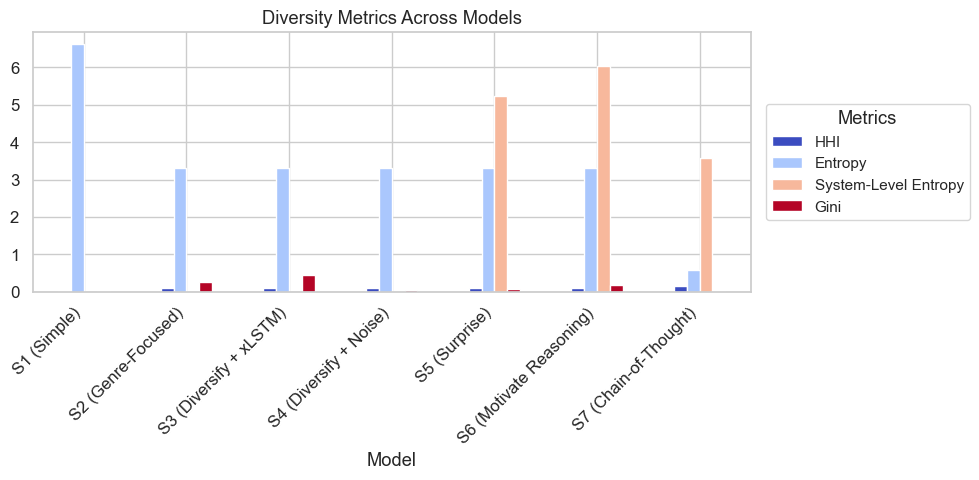

In [81]:
# --- Plot 3: Diversity Metrics ---
diversity_metrics = ["HHI", "Entropy", "System-Level Entropy", "Gini"]
fig, ax = plt.subplots(figsize=(10, 5))
df[diversity_metrics].plot(kind='bar', ax=ax, colormap='coolwarm')
ax.set_title("Diversity Metrics Across Models")
ax.set_xticklabels(df.index, rotation=45, ha='right')
ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), title="Metrics", fontsize='small')
plt.tight_layout()
plt.show()

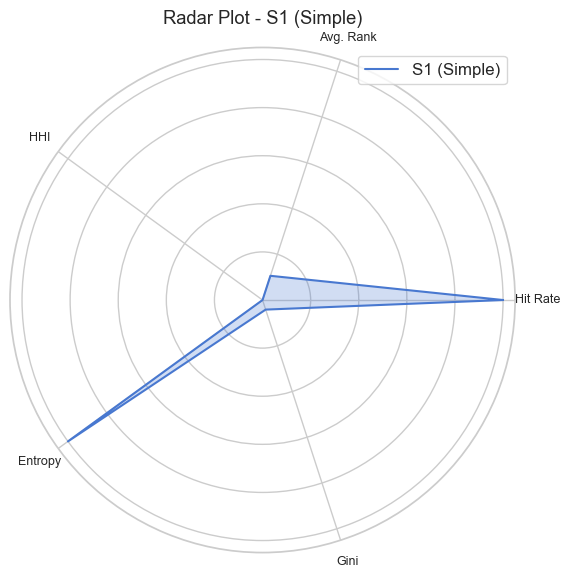

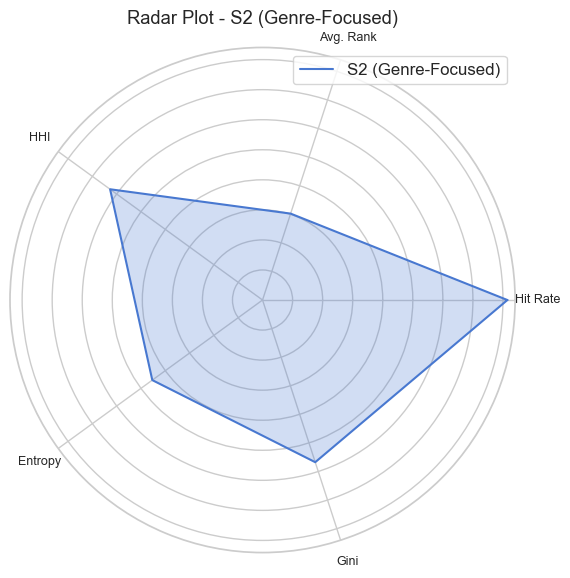

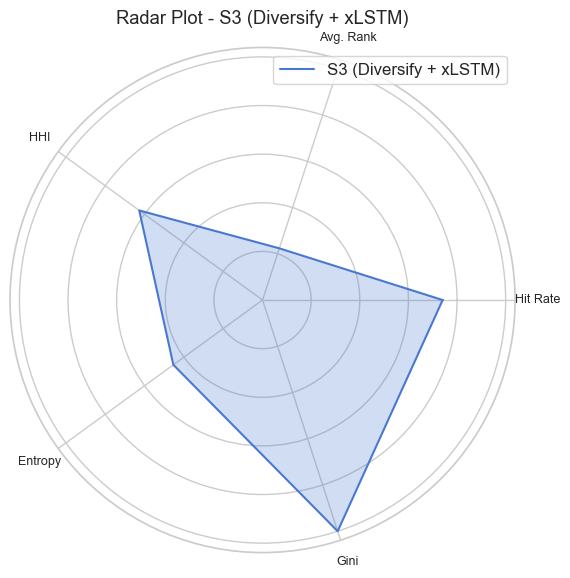

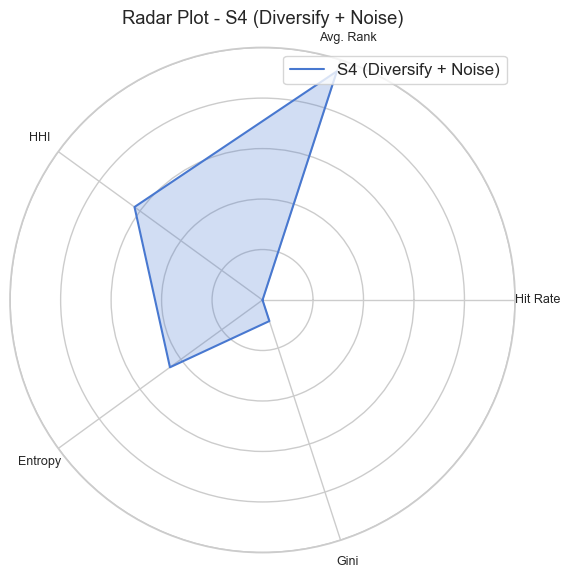

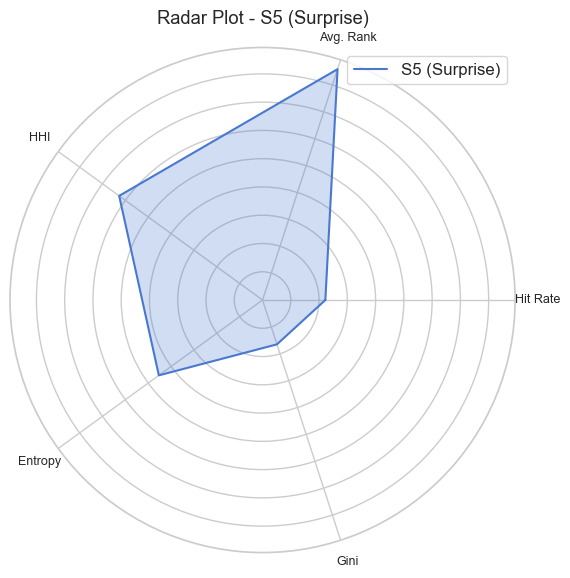

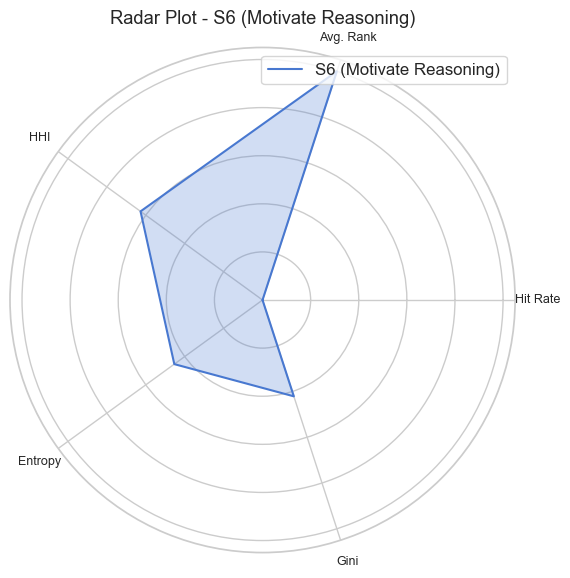

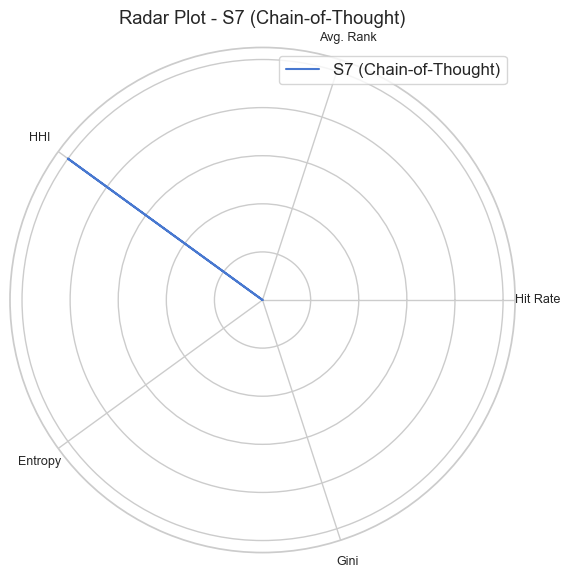

In [82]:
# --- Radar Plot: Individual Models ---
df_radar = df_normalized.drop(columns=["System-Level Entropy", "Recall@5", "NDCG@5"], errors='ignore')

def plot_radar(model_name, df_norm):
    labels = df_norm.columns
    stats = df_norm.loc[model_name].values
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    stats = np.concatenate((stats, [stats[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, stats, label=model_name)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=9)
    ax.set_yticklabels([])
    ax.set_title(f"Radar Plot - {model_name}")
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

for model in df_radar.index:
    plot_radar(model, df_radar)

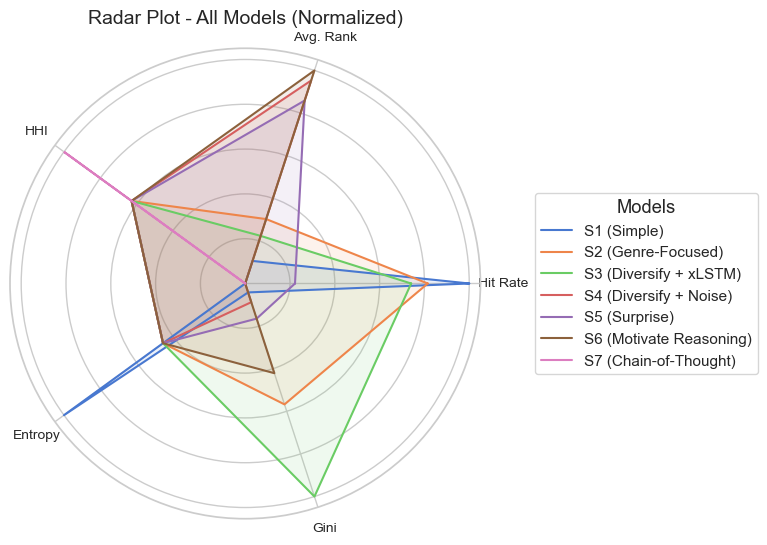

In [83]:
# --- Radar Plot: All Models ---
def plot_all_radar(df):
    labels = df.columns.tolist()
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    for model in df.index:
        stats = df.loc[model].values
        stats = np.concatenate((stats, [stats[0]]))
        ax.plot(angles, stats, label=model)
        ax.fill(angles, stats, alpha=0.1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_yticklabels([])
    ax.set_title("Radar Plot - All Models (Normalized)", size=14)
    ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize='small', title='Models')
    plt.tight_layout()
    plt.show()

plot_all_radar(df_radar)

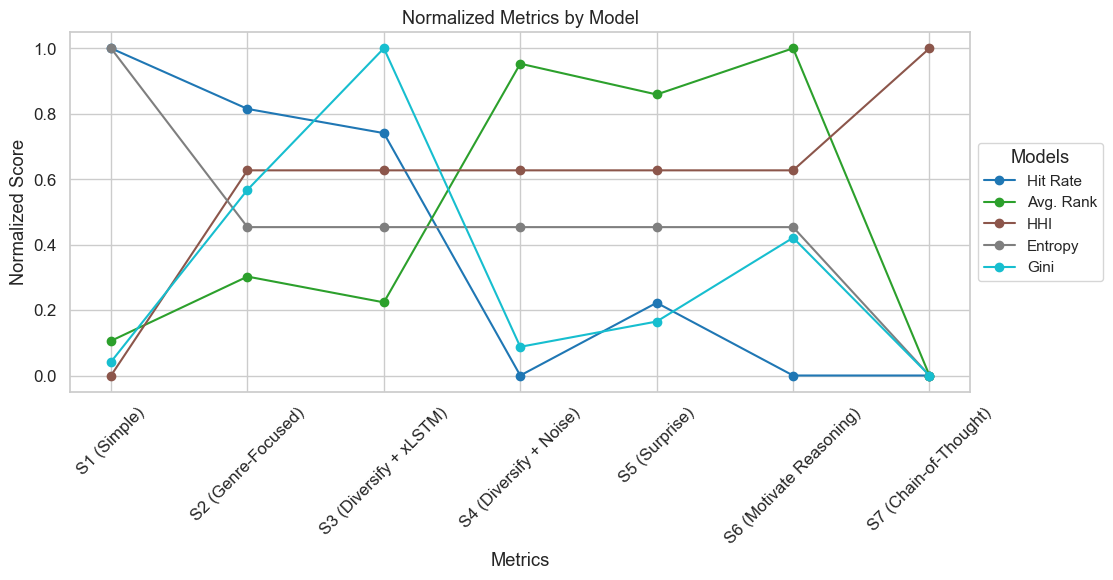

In [96]:
def plot_line_with_external_legend(df):
    # Ensure df is in the correct format: rows = metrics, columns = models
    fig, ax = plt.subplots(figsize=(10, 6))

    df.plot(ax=ax, marker='o', colormap='tab10')  # Plot as is (metrics as index)

    ax.set_title("Normalized Metrics by Model")
    ax.set_ylabel("Normalized Score")
    ax.set_xlabel("Metrics")
    ax.set_xticks(range(len(df.index)))
    ax.set_xticklabels(df.index, rotation=45)
    ax.grid(True)

    # Move legend outside the plot
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize='small', title='Models')

    plt.tight_layout()
    plt.show()

plot_line_with_external_legend(df_radar)

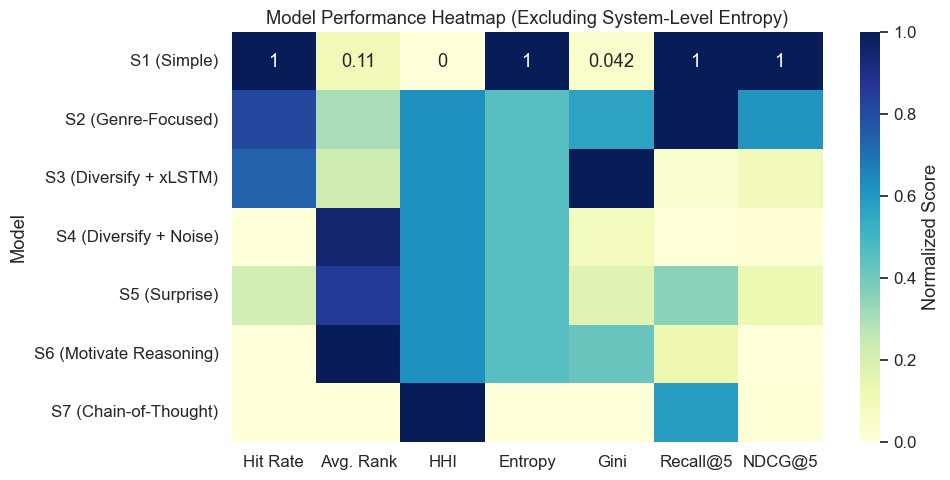

In [85]:
# --- Heatmap: Normalized Metrics ---
df_heatmap = df_normalized.drop(columns=["System-Level Entropy"], errors='ignore')
plt.figure(figsize=(10, 5))
sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Normalized Score'})
plt.title("Model Performance Heatmap (Excluding System-Level Entropy)")
plt.tight_layout()
plt.show()

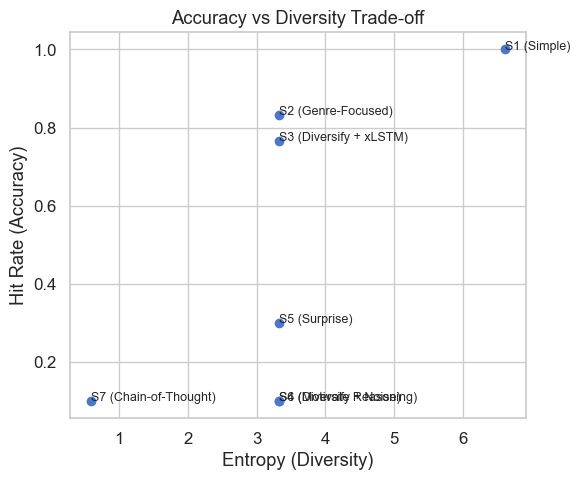

In [86]:
# --- Scatter Plot: Accuracy vs Diversity ---
if "Entropy" in df.columns and "Hit Rate" in df.columns:
    plt.figure(figsize=(6, 5))
    plt.scatter(df["Entropy"], df["Hit Rate"])
    for model in df.index:
        plt.text(df["Entropy"][model], df["Hit Rate"][model], model, fontsize=9)
    plt.xlabel("Entropy (Diversity)")
    plt.ylabel("Hit Rate (Accuracy)")
    plt.title("Accuracy vs Diversity Trade-off")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

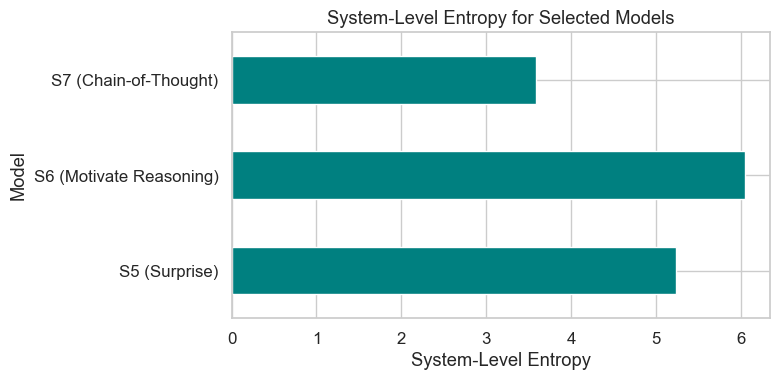

In [87]:
# --- Horizontal Bar Plot: System-Level Entropy ---
df_entropy_only = df[df["System-Level Entropy"].notna()]
plt.figure(figsize=(8, 4))
df_entropy_only["System-Level Entropy"].plot(kind='barh', color='teal')
plt.xlabel("System-Level Entropy")
plt.title("System-Level Entropy for Selected Models")
plt.tight_layout()
plt.show()